<a href="https://colab.research.google.com/github/Mevaria/AAI643O_Wehbe/blob/main/Week%202/lesson2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Notebook for practical exercises | Week #2 Lesson #2

## Introduction

This notebook contains practical hands-on exercises for the lesson about *Data visualization*.

After this session, you will know how to visualize and interprete a medical imaging dataset for training an AI model. We will implement and dissect four dimension reduction techniques which enables to better understand the data:
- Principal Component Analysis (PCA)
- t-distributed Stochastic Neighbor Embedding (t-SNE)
- Uniform Manifold Approximation and Projection (UMAP)
- Linear Discriminant Analysis (LDA)

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os
import umap

from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
from sklearn.manifold import TSNE

## Dataset

We will re-use the features extracted at lesson #1. If you did not succeed in extracting these features, we provide you with a back-up.

### Download the backup

Run the following cells to download the backup.

<div class="alert alert-block alert-danger">
<b>Replace the <code>DATA_PATH</code> with the path where you want to store the data folder. By default, it will be stored at the root of this repository.</b> <br>
<b>If you already have the radiomic features, comment the following cell by adding a <code>#</code> before the <code>!</code></b>
</div>

In [3]:
DATA_PATH = './'

if not os.path.exists(f'{DATA_PATH}/data'):
    os.mkdir(f'{DATA_PATH}/data')

if not os.path.exists(f'{DATA_PATH}/data/ReMIND'):
    os.mkdir(f'{DATA_PATH}/data/ReMIND')

#!curl https://uni-bonn.sciebo.de/s/9TFdE2wQX4KatS5/download --output {DATA_PATH}/data/ReMIND/radiomics_standardized.csv

<div class="alert alert-block alert-info">
<b>Q1.</b> Load the standardized radiomic features in variable named <b>features</b>. Remove the columns containing the patient ID and the tumor label. Store the tumor label column in another variable named <b>labels</b>.
</div>

In [4]:
df = pd.read_csv(f'{DATA_PATH}/data/ReMIND/radiomics_standardized.csv') # Uploaded from Lesson 1

df.columns

Index(['original_shape_Elongation', 'original_shape_Flatness',
       'original_shape_LeastAxisLength', 'original_shape_MajorAxisLength',
       'original_shape_Maximum2DDiameterColumn',
       'original_shape_Maximum2DDiameterRow',
       'original_shape_Maximum2DDiameterSlice',
       'original_shape_Maximum3DDiameter', 'original_shape_MeshVolume',
       'original_shape_MinorAxisLength',
       ...
       'original_glszm_ZoneEntropy', 'original_glszm_ZonePercentage',
       'original_glszm_ZoneVariance', 'original_ngtdm_Busyness',
       'original_ngtdm_Coarseness', 'original_ngtdm_Complexity',
       'original_ngtdm_Contrast', 'original_ngtdm_Strength', 'patient',
       'tumor'],
      dtype='object', length=109)

In [5]:
df.head()

,original_shape_Elongation,original_shape_Flatness,original_shape_LeastAxisLength,original_shape_MajorAxisLength,original_shape_Maximum2DDiameterColumn,original_shape_Maximum2DDiameterRow,original_shape_Maximum2DDiameterSlice,original_shape_Maximum3DDiameter,original_shape_MeshVolume,original_shape_MinorAxisLength,...,original_glszm_ZoneEntropy,original_glszm_ZonePercentage,original_glszm_ZoneVariance,original_ngtdm_Busyness,original_ngtdm_Coarseness,original_ngtdm_Complexity,original_ngtdm_Contrast,original_ngtdm_Strength,patient,tumor
0,0.886937,1.129488,1.382908,0.226456,0.812559,0.318559,0.335883,0.235266,0.456030,0.686918,...,0.582536,-0.227894,-0.302238,-0.179815,-0.337345,-0.111836,-0.400073,-0.159703,1,3
1,1.045898,0.527558,0.099538,-0.386613,-0.215478,-0.240196,-0.239368,-0.397025,-0.216641,0.004329,...,-0.179663,-0.805991,-0.203110,-0.029450,-0.290198,-0.123853,-0.498908,-0.296004,2,2
2,-0.860289,-0.602358,-1.033066,-0.954134,-0.791582,-0.973091,-1.236085,-0.906704,-0.492896,-1.082474,...,0.503309,-0.218784,-0.377573,-0.428944,-0.208435,-0.115504,-0.474744,0.649204,3,2
3,1.348878,1.157942,-0.818761,-1.249656,-1.072987,-1.218162,-1.201648,-1.246312,-0.493749,-1.019078,...,-1.079724,-0.225053,-0.379354,-0.317153,0.129753,-0.124424,-0.304948,-0.202798,4,1
4,-0.431904,-0.569769,-0.660428,-0.502832,-0.308068,-0.301762,-0.736652,-0.333588,-0.430282,-0.586843,...,1.403851,0.671246,-0.385467,-0.421754,-0.297939,-0.070754,-0.289347,1.348969,6,2


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 86 entries, 0 to 85
Columns: 109 entries, original_shape_Elongation to tumor
dtypes: float64(107), int64(2)
memory usage: 73.4 KB


In [7]:
df.describe()

,original_shape_Elongation,original_shape_Flatness,original_shape_LeastAxisLength,original_shape_MajorAxisLength,original_shape_Maximum2DDiameterColumn,original_shape_Maximum2DDiameterRow,original_shape_Maximum2DDiameterSlice,original_shape_Maximum3DDiameter,original_shape_MeshVolume,original_shape_MinorAxisLength,...,original_glszm_ZoneEntropy,original_glszm_ZonePercentage,original_glszm_ZoneVariance,original_ngtdm_Busyness,original_ngtdm_Coarseness,original_ngtdm_Complexity,original_ngtdm_Contrast,original_ngtdm_Strength,patient,tumor
count,8.600000e+01,8.600000e+01,8.600000e+01,8.600000e+01,8.600000e+01,8.600000e+01,8.600000e+01,8.600000e+01,8.600000e+01,8.600000e+01,...,8.600000e+01,8.600000e+01,8.600000e+01,8.600000e+01,8.600000e+01,8.600000e+01,8.600000e+01,8.600000e+01,86.000000,86.000000
mean,8.133029e-17,-4.279522e-16,-1.742792e-16,-3.737321e-16,4.324706e-16,-7.487551e-17,5.228376e-16,9.036699e-18,1.052130e-16,-8.907603e-17,...,-8.068481e-16,2.310813e-16,3.033749e-17,8.326673e-17,5.228376e-17,2.662599e-17,7.874838e-17,-6.002950e-17,57.767442,3.046512
std,1.005865e+00,1.005865e+00,1.005865e+00,1.005865e+00,1.005865e+00,1.005865e+00,1.005865e+00,1.005865e+00,1.005865e+00,1.005865e+00,...,1.005865e+00,1.005865e+00,1.005865e+00,1.005865e+00,1.005865e+00,1.005865e+00,1.005865e+00,1.005865e+00,33.523188,0.931880
min,-2.985865e+00,-2.195973e+00,-1.442092e+00,-1.589153e+00,-1.510057e+00,-1.578020e+00,-1.583815e+00,-1.611830e+00,-5.202297e-01,-1.544607e+00,...,-2.703872e+00,-1.125679e+00,-3.865697e-01,-4.457265e-01,-3.601087e-01,-1.250878e-01,-5.694863e-01,-4.376144e-01,1.000000,1.000000
25%,-8.390916e-01,-6.948984e-01,-8.092030e-01,-6.298684e-01,-6.198070e-01,-6.662063e-01,-6.507301e-01,-6.179125e-01,-4.545989e-01,-6.664709e-01,...,-7.180734e-01,-7.367021e-01,-3.849221e-01,-3.855130e-01,-3.364347e-01,-1.243655e-01,-4.985653e-01,-3.668286e-01,26.250000,2.000000
50%,2.594288e-01,1.181647e-01,-1.182627e-01,-1.636230e-01,-1.699188e-01,-1.930646e-01,-1.876453e-01,-1.454043e-01,-3.134963e-01,-1.789514e-01,...,6.232387e-02,-3.680237e-01,-3.462745e-01,-2.511262e-01,-2.905712e-01,-1.224329e-01,-3.376362e-01,-3.015282e-01,57.500000,3.000000
75%,8.579187e-01,8.087838e-01,5.753890e-01,4.743086e-01,3.739845e-01,6.235606e-01,4.576784e-01,4.686389e-01,1.812370e-02,3.799427e-01,...,4.997261e-01,4.848660e-01,-1.350175e-01,-1.156121e-02,-1.632645e-01,-1.191021e-01,1.099516e-01,-9.462890e-02,84.500000,4.000000
max,1.562354e+00,1.654295e+00,4.017796e+00,4.061001e+00,4.018053e+00,3.376299e+00,3.927549e+00,3.628668e+00,7.106733e+00,3.528244e+00,...,3.227189e+00,3.359632e+00,6.654188e+00,8.159259e+00,6.413011e+00,9.207253e+00,7.240807e+00,6.740477e+00,114.000000,4.000000


In [9]:
df.isna().sum().sum()

np.int64(0)

In [10]:
df.dtypes

,0
original_shape_Elongation,float64
original_shape_Flatness,float64
original_shape_LeastAxisLength,float64
original_shape_MajorAxisLength,float64
original_shape_Maximum2DDiameterColumn,float64
...,...
original_ngtdm_Complexity,float64
original_ngtdm_Contrast,float64
original_ngtdm_Strength,float64
patient,int64


In [11]:
features = df.drop(['patient', 'tumor'], axis=1) # COMPLETE
labels = df['tumor'] #COMPLETE

In [12]:
features.head()

,original_shape_Elongation,original_shape_Flatness,original_shape_LeastAxisLength,original_shape_MajorAxisLength,original_shape_Maximum2DDiameterColumn,original_shape_Maximum2DDiameterRow,original_shape_Maximum2DDiameterSlice,original_shape_Maximum3DDiameter,original_shape_MeshVolume,original_shape_MinorAxisLength,...,original_glszm_SmallAreaHighGrayLevelEmphasis,original_glszm_SmallAreaLowGrayLevelEmphasis,original_glszm_ZoneEntropy,original_glszm_ZonePercentage,original_glszm_ZoneVariance,original_ngtdm_Busyness,original_ngtdm_Coarseness,original_ngtdm_Complexity,original_ngtdm_Contrast,original_ngtdm_Strength
0,0.886937,1.129488,1.382908,0.226456,0.812559,0.318559,0.335883,0.235266,0.456030,0.686918,...,-0.133913,-0.000816,0.582536,-0.227894,-0.302238,-0.179815,-0.337345,-0.111836,-0.400073,-0.159703
1,1.045898,0.527558,0.099538,-0.386613,-0.215478,-0.240196,-0.239368,-0.397025,-0.216641,0.004329,...,-0.173311,0.582854,-0.179663,-0.805991,-0.203110,-0.029450,-0.290198,-0.123853,-0.498908,-0.296004
2,-0.860289,-0.602358,-1.033066,-0.954134,-0.791582,-0.973091,-1.236085,-0.906704,-0.492896,-1.082474,...,-0.057937,-0.548321,0.503309,-0.218784,-0.377573,-0.428944,-0.208435,-0.115504,-0.474744,0.649204
3,1.348878,1.157942,-0.818761,-1.249656,-1.072987,-1.218162,-1.201648,-1.246312,-0.493749,-1.019078,...,-0.181852,0.607120,-1.079724,-0.225053,-0.379354,-0.317153,0.129753,-0.124424,-0.304948,-0.202798
4,-0.431904,-0.569769,-0.660428,-0.502832,-0.308068,-0.301762,-0.736652,-0.333588,-0.430282,-0.586843,...,0.001006,-0.549659,1.403851,0.671246,-0.385467,-0.421754,-0.297939,-0.070754,-0.289347,1.348969


There are no null values. All the columns are of type float except for patient and tumor, which are int.

## I. Principal Component Analysis (PCA)

The goal of the PCA is to find the directions (also called *"principal components"*) where the **data vary the most**.
- **Unsupervised**: does not use nor require class labels ;
- **Linear**: each principal component is a weighted combination of original features, orthogonal to others.

### How does it work?

1. Computes the covariance matrix of the data.
2. Finds eigenvectors (directions) and eigenvalues (amount of variance explained).
3. Projects the data onto the top-k components that explain the most variance.

### Pros/Cons

- Interest for variance rather than class separability ;
- Linear projection for modeling or pre-processing (can be used as feature extractor) ;
- Not useful if data is nonlinear or clusters overlap along directions of high variance.

### Implementation

We will start by computing the PCA with `n_components=2`, which means that we only want to compute the top-2 components that explain the most variance.

<div class="alert alert-block alert-info">
<b>Q2.</b> Visualize the results with the scatterplot. What can you say about the amount of variance between data?
</div>

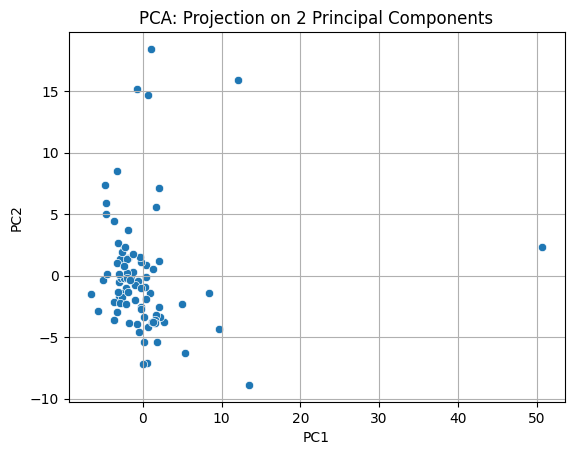

In [13]:
pca = PCA(n_components=2)
X_pca = pca.fit_transform(features)

sns.scatterplot(x=X_pca[:,0], y=X_pca[:,1])
plt.title("PCA: Projection on 2 Principal Components")
plt.xlabel("PC1")
plt.ylabel("PC2")
plt.grid(True)
plt.show()

You can label the points for better interpretability using the `hue` argument of the `scatterplot` function.

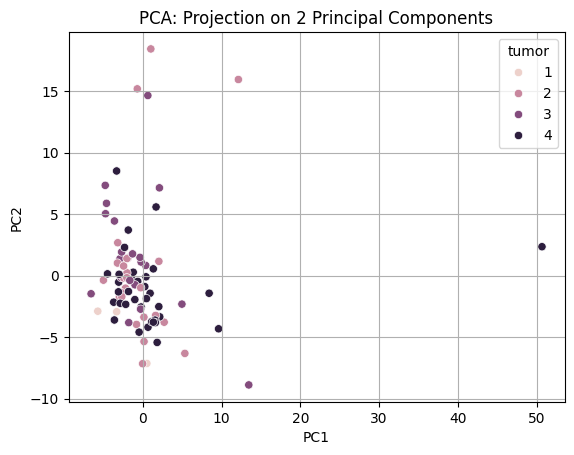

In [14]:
pca = PCA(n_components=2)
X_pca = pca.fit_transform(features)

sns.scatterplot(x=X_pca[:,0], y=X_pca[:,1], hue=labels)
plt.title("PCA: Projection on 2 Principal Components")
plt.xlabel("PC1")
plt.ylabel("PC2")
plt.grid(True)
plt.show()

**A2.**
Most samples overlap near the center, so the first two components do not clearly separate tumor classes. A single sample appears as a strong outlier along the first principal component, while most samples remain tightly clustered near the center.

Overall, the variance captured is not strongly linked to class differences.

### Quantitative values

Besides plotting the components, you can also have a look at the values of the PCA.

First, you can look at the **explained variance ratio**, which tells you how much of the total variance is captured by each principal component.

In [15]:
# Explained variance per component
explained_var = pca.explained_variance_ratio_
print("Explained variance ratio:", explained_var)

Explained variance ratio: [0.39108886 0.21220519]


You can also look at the **feature loadings**. These show how much each original feature contributes to each principal component.

In [16]:
# Get the loadings
loadings = pd.DataFrame(
    pca.components_.T,  # Transpose so rows are features
    columns=[f'PC{i+1}' for i in range(len(pca.components_))],
    index=features.columns
)

In [17]:
# Show top contributing features for PC1
loadings['PC1'].sort_values(key=abs, ascending=False).head(10)

,PC1
original_firstorder_MeanAbsoluteDeviation,0.151431
original_firstorder_InterquartileRange,0.150754
original_firstorder_RobustMeanAbsoluteDeviation,0.150613
original_firstorder_90Percentile,0.150563
original_firstorder_Maximum,0.148998
original_firstorder_Range,0.148157
original_glcm_DifferenceAverage,0.147948
original_glrlm_LongRunHighGrayLevelEmphasis,0.144639
original_glrlm_HighGrayLevelRunEmphasis,0.144430
original_glrlm_ShortRunHighGrayLevelEmphasis,0.144304


In [18]:
# Show worst contributing features for PC1
loadings['PC1'].sort_values(key=abs, ascending=True).head(10)

,PC1
original_glrlm_LongRunEmphasis,-0.000046
original_glrlm_GrayLevelNonUniformity,0.000961
original_firstorder_Skewness,-0.001819
original_glcm_Idmn,0.004142
original_glrlm_LowGrayLevelRunEmphasis,-0.005960
original_glrlm_RunVariance,0.007513
original_glcm_Idn,0.008237
original_gldm_DependenceVariance,0.008763
original_glszm_LargeAreaLowGrayLevelEmphasis,0.009545
original_gldm_SmallDependenceLowGrayLevelEmphasis,-0.011956


<div class="alert alert-block alert-info">
<b>Q3.</b> Analyse the results and answer the following questions:
    <br>
    - Are the features linearly separable?
    <br>
    - Does the tumor grade explain the largest amount of variance?
    <br>
    - Does the shape of the tumor does contribute to a large amount of variance?
</div>

**A3.**
- No, the variance explained in the first 2 components is very low
- No, samples of different tumor grades are heavily mixed and do not form distinct clusters.
- No, the dominant contributors to PC1 are first-order features, not shape features.

## II. T-distributed Stochastic Neighbor Embedding (t-SNE)

t-SNE emphasizes local structure by keeping similar points close. This technique is highly useful for exploring clusters.
- **Nonlinear**
- **Unsupervised**

### How does it work?
1. Converts pairwise distances into probabilities that measure similarity ;
2. Tries to minimize the difference between high- and low-dimensional similarities ;
3. Uses perplexity as a smoothing parameter (number of neighbors).

### Pros/Cons
- Results cannot be interpreted quantitatively (distances are not reliable) ;
- Sensitive to perplexity and random seed — unstable with noise or outliers ;
- Useful for data exploration, not for data modelling.

### Implementation

In [18]:
tsne = TSNE(n_components=2, perplexity=30, random_state=42)
X_tsne = tsne.fit_transform(features)

<div class="alert alert-block alert-info">
<b>Q4.</b> Plot the results, similarly to what we have done for the PCA and explore similarity across tumor grades.
</div>

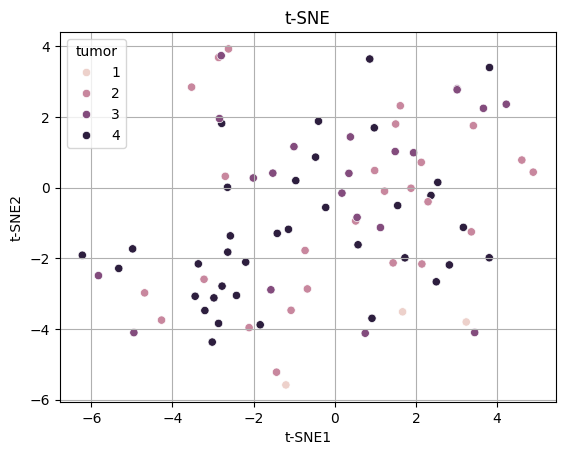

In [19]:
sns.scatterplot(x=X_tsne[:,0], y=X_tsne[:,1], hue=labels)
plt.title("t-SNE")
plt.xlabel("t-SNE1")
plt.ylabel("t-SNE2")
plt.grid(True)
plt.show()

**A4.** The t-SNE plot shows that tumor grades are largely mixed, with no clear clusters. This suggests that samples from different grades are similar in the feature space.

<div class="alert alert-block alert-info">
<b>Q5.</b> Modify the parameters of the tSNE (perplexity, random state) and compare the results. Discuss the reproducibility and sensitivity of the algorighm.
</div>

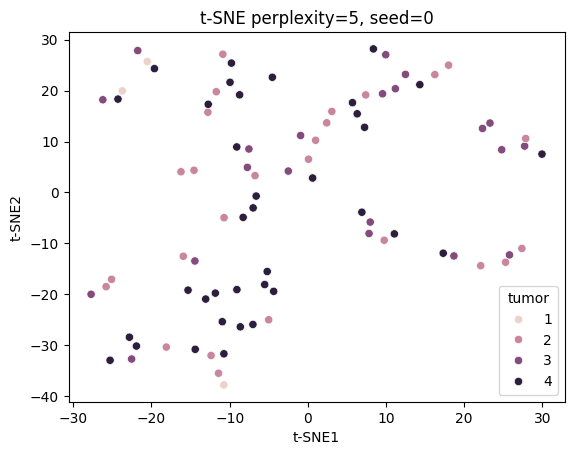

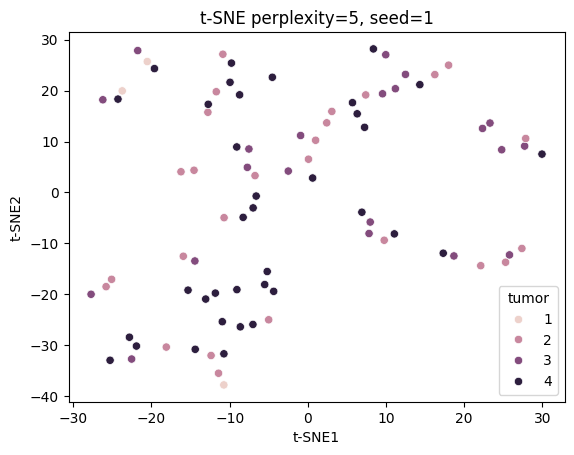

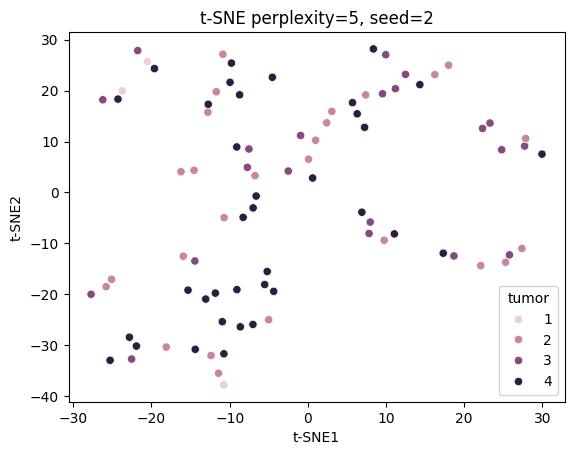

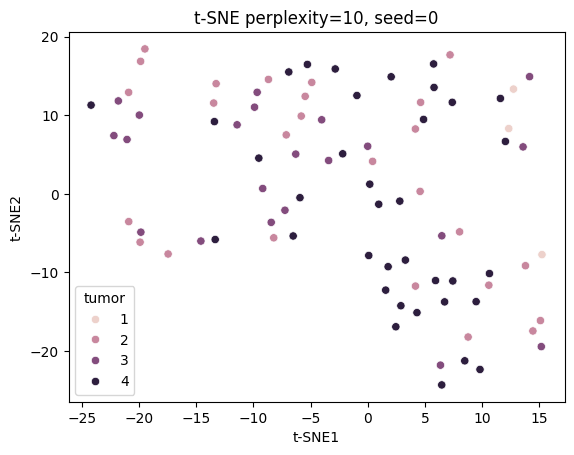

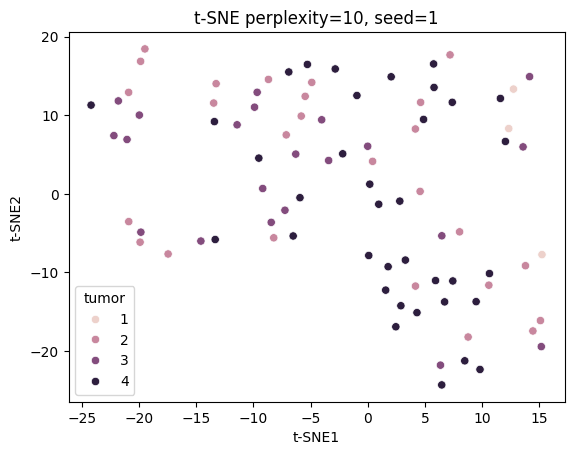

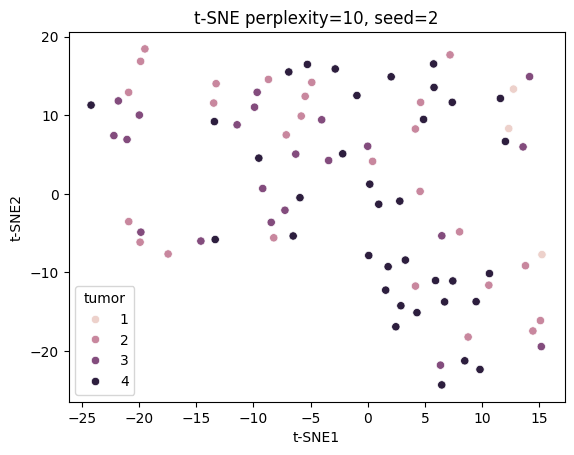

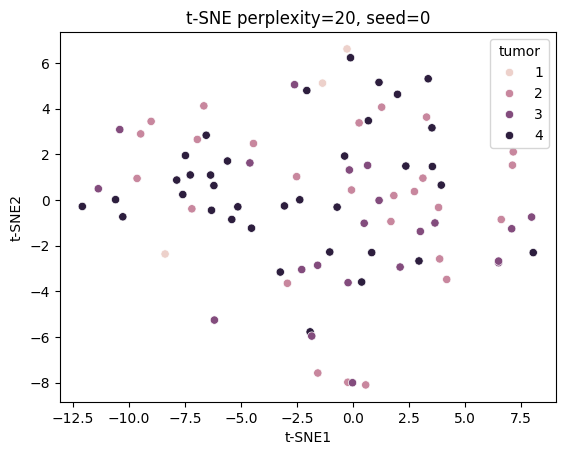

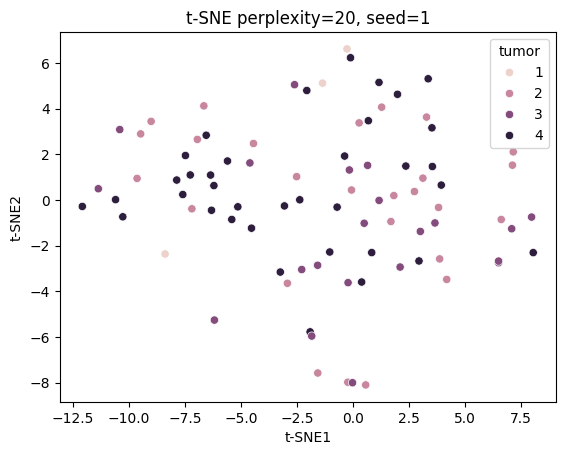

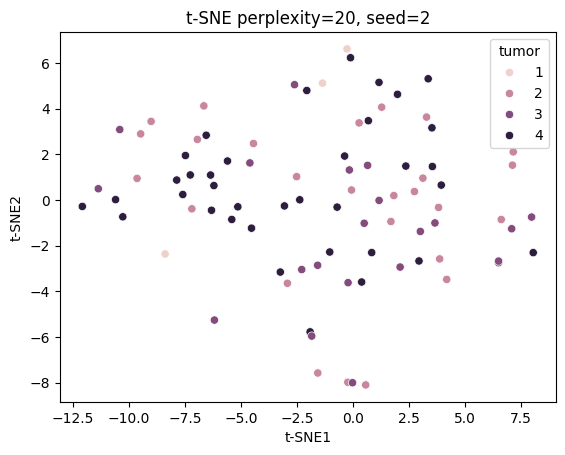

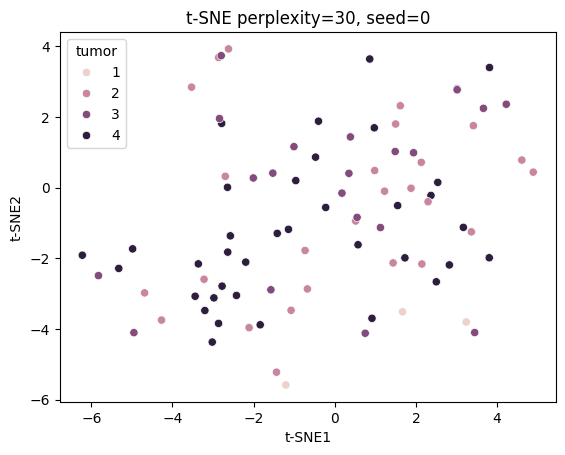

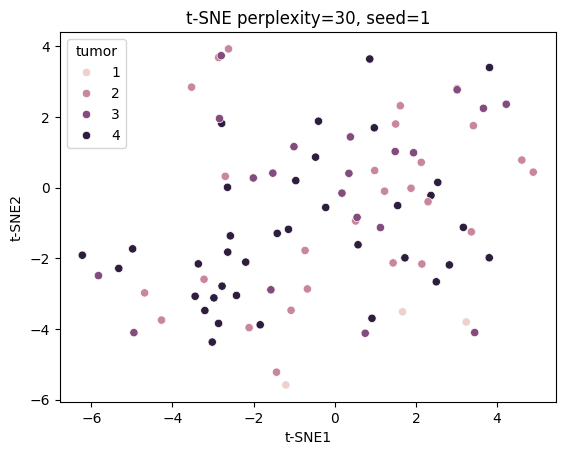

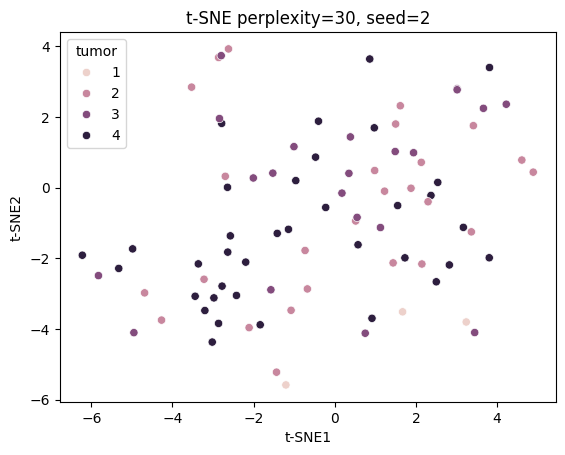

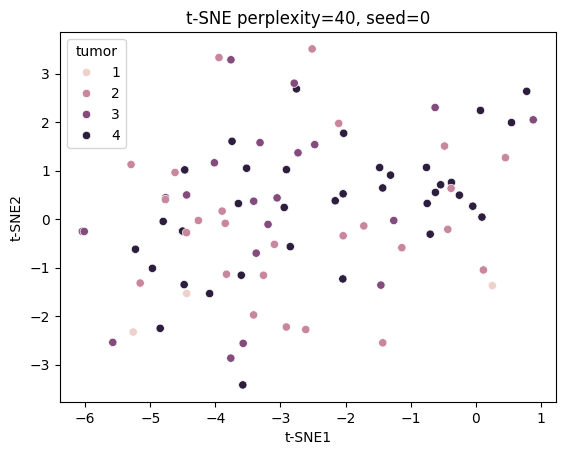

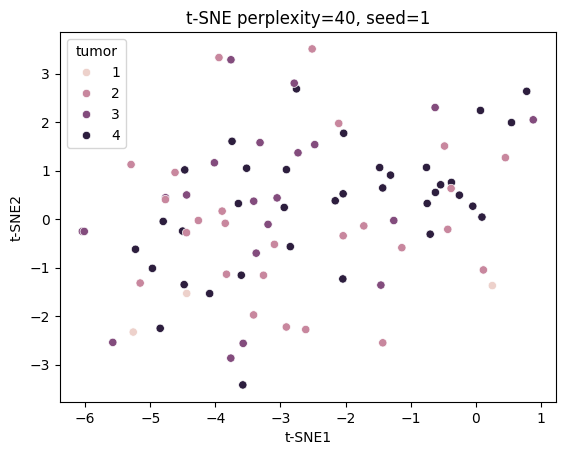

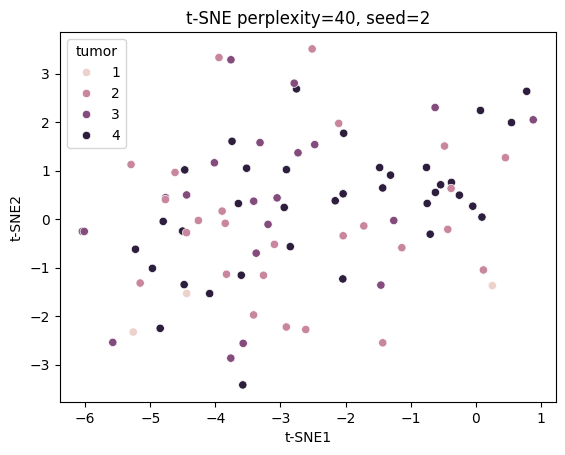

In [22]:
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt

perplexities = [5, 10, 20, 30, 40]
seeds = [0, 1, 2]

for p in perplexities:
    for s in seeds:
        Z = TSNE(
            n_components=2,
            perplexity=p,
            random_state=s,
            learning_rate="auto"
        ).fit_transform(features)

        plt.figure()
        sns.scatterplot(x=Z[:,0], y=Z[:,1], hue=labels)
        plt.title(f"t-SNE perplexity={p}, seed={s}")
        plt.xlabel("t-SNE1")
        plt.ylabel("t-SNE2")
        plt.show()


**A5.**
- Sensitivity: Changing the perplexity noticeably changes the t-SNE plot because it affects how local relationships are modeled.

- Reproducibility: Changing the random seed had little effect, suggesting the results are stable for this dataset.

## III. Uniform Manifold Approximation and Projection (UMAP)

UMAP balances local and global structure in data. It constructs a high dimensional graph representation of the data then optimizes a low-dimensional graph to be as structurally similar as possible.
- **Nonlinear**
- **Unsupervised**

Have a look at this interactive website about the difference between UMAP and tSNE:
[https://pair-code.github.io/understanding-umap/](https://pair-code.github.io/understanding-umap/).

/usr/local/lib/python3.12/dist-packages/umap/umap_.py:1952: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(


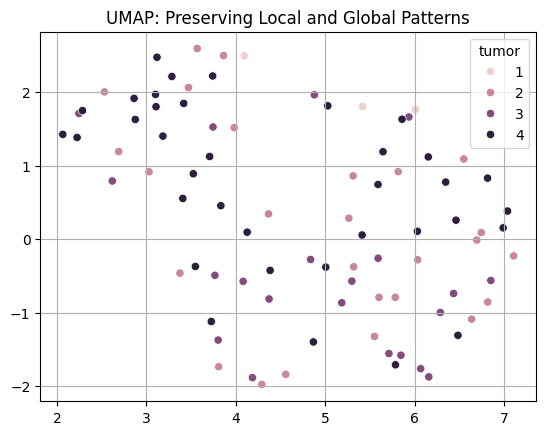

In [20]:
reducer = umap.UMAP(n_components=2, random_state=42)
X_umap = reducer.fit_transform(features)

sns.scatterplot(x=X_umap[:,0], y=X_umap[:,1], hue=labels)
plt.title("UMAP: Preserving Local and Global Patterns")
plt.grid(True)
plt.show()

<div class="alert alert-block alert-info">
<b>Q6.</b> Visualize the features color-coded by tumor grade. Compare with the previous visualization and hypothesize on the variance and separability of features.
</div>

**A6**. Similarly to PCA and t-SNE, tumor grades largely overlap in the UMAP plot, with no clear separation. While local structure is better preserved, there is still no clear grade-based separation, suggesting tumor grade does not explain most of the feature variance.

## IV. Linear Discriminant Analysis (LDA)

LDA finds directions that best separate known classes.
- **Supervised**: uses label Y to find discriminant axes
- **Linear**

### How does it work?
1. Calculates between-class and within-class scatter ;
2. Maximizes the ratio of between-class to within-class variance ;
3. Finds axes (discriminants) that maximize class separation.

### Pros/Cons
- Requires to have access to class labels.
- If the data have too many classes vs. too few samples, LDA can overfit.
- Nonlinear class separation — LDA can miss curved or nested boundaries.
- Classes must be reasonably normally distributed with equal covariance.

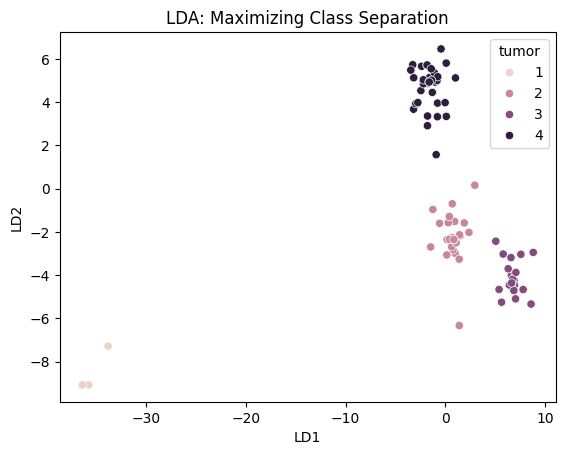

In [21]:
lda = LDA(n_components=2)
X_lda = lda.fit_transform(features, labels)

sns.scatterplot(x=X_lda[:,0], y=X_lda[:,1], hue=labels)
plt.title("LDA: Maximizing Class Separation")
plt.xlabel("LD1")
plt.ylabel("LD2")
plt.grid(False)
plt.show()

Similar to PCA, we can explore quantitative parameters of the LDA.

Each linear discriminant (LD1, LD2, etc.) represents a direction that separates the classes. You can check how much class separation each one contributes. Explained variance ratio, in that case, will tell you how much of the total class-discriminating power is captured by each axis.

<div class="alert alert-block alert-info">
<b>Q7.</b> Print the <b>explained variance ratio</b> of the LDA. How does it compare to the one obtained with PCA?
</div>

In [22]:
# Explained variance ratio
print(lda.explained_variance_ratio_) # COMPLETE

[0.69284842 0.21295555]


**A7.** LDA shows a higher explained variance on the first axis (~69%) compared to PCA

<div class="alert alert-block alert-info">
<b>Q8.</b> Using the code below, complete and visualize the most important features to separate classes. These are stored in the attribute <b>coef_</b>. <br>
Compare with the ones obtained with PCA.
</div>

In [23]:
# Get the loadings
coefficients = pd.DataFrame(
    lda.coef_.T,  # COMPLETE with transposed coefficients
    columns=[f'LD{i+1}' for i in range(len(lda.classes_))], # COMPLETE with numbers of LD
    index=features.columns
)

In [24]:
coefficients['LD1'].sort_values(key=abs, ascending=False).head(10)

,LD1
original_gldm_SmallDependenceHighGrayLevelEmphasis,-16134.637724
original_firstorder_Energy,11292.294343
original_glcm_ClusterTendency,-9765.844830
original_glcm_SumSquares,-9572.146002
original_glcm_Idm,9228.450967
original_ngtdm_Complexity,8892.607788
original_glszm_HighGrayLevelZoneEmphasis,8461.205244
original_firstorder_Uniformity,7893.669634
original_glszm_GrayLevelVariance,7806.860066
original_glrlm_RunLengthNonUniformityNormalized,7042.272414


**A8.** LDA identifies texture-related features as most important for separating classes, whereas PCA highlights simple intensity-based features that explain variance but do not separate grades well.

<div class="alert alert-block alert-info">
<b>Q9.</b> Overall, which visualization strategy gave you the largest amount of information on the dataset? What can you conclude?
</div>

**A9.** LDA is the most informative for this dataset because it uses class labels. Overall, tumor grades overlap considerably, so separability is limited, but texture features provide some useful discrimination.

## V. Out-of-sample mapping

Dimension reduction strategies are particularly useful to visualize clusters / groups of points in the dataset. When a new sample comes out, we can also use these techniques to compare this sample to the others: *e.g.*, if this sample is close to other samples from a particular class, we can suppose that it belongs to this class.

<div class="alert alert-block alert-info">
<b>Q10.</b> Given the features of a new sample below, use the <b>transform</b> function from the <b>lda</b> variable to compute the values of the linear discriminants for this sample. Add this sample to the previous plot and hypothesize on the class of this new sample.
</div>

In [25]:
new_sample = [[ 1.26834163,  1.06519637,  0.35581886, -0.40428694, -0.22592274,
        -0.21538908, -0.19894005, -0.30840048, -0.29237031,  0.03156306,
        -1.03046226, -0.13122895,  0.01972289, -0.2939223 ,  0.76823103,
         0.18890958, -0.13079974,  0.8846071 , -0.02335545, -0.63297882,
        -0.05560648, -0.02177836,  0.45498866,  0.49332652, -0.29193337,
        -0.03531171, -0.0351121 ,  0.33731763, -0.99082835, -0.13445852,
        -0.93477499, -0.11254808,  0.00860319, -0.10487846, -0.10991895,
        -0.11511869, -0.09068093, -0.19177814,  0.36747709,  0.96626843,
        -0.10781029, -1.13306325, -1.16947488, -0.10713231, -0.49413587,
         0.88910261, -0.26019065, -0.89344071,  0.6647477 , -0.58359377,
         1.03257508, -0.47075593, -0.70508202,  0.66034939,  0.83887402,
        -0.11654601,  0.46703375, -0.2495636 ,  0.86488433, -0.70132276,
        -0.38462811, -0.11742991,  0.00180459, -0.79520315,  0.36510164,
        -0.29583286, -0.41202009,  1.10673151, -0.0877228 , -0.62447257,
        -0.7080512 , -0.91838497, -0.11885765, -0.02021118, -0.42169212,
        -0.00341436, -0.24771799, -0.60542841,  0.4252188 , -0.2979829 ,
         1.14659038,  1.03979075, -0.33879935,  1.03731472, -0.02132954,
        -0.77676779, -0.14083675, -0.66600007, -0.12169235, -0.07525772,
        -0.38246718, -0.55088664, -0.20938972, -0.48735671, -0.17152936,
         0.54843396,  0.56775172, -0.0943027 , -0.52908346,  0.40415871,
         1.0792584 , -0.37506485, -0.38651042, -0.24627587, -0.11221304,
         0.10279348, -0.27811461]]

In [26]:
X_new_lda = lda.transform(new_sample) # COMPLETE with the correct function

/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LinearDiscriminantAnalysis was fitted with feature names
  warnings.warn(


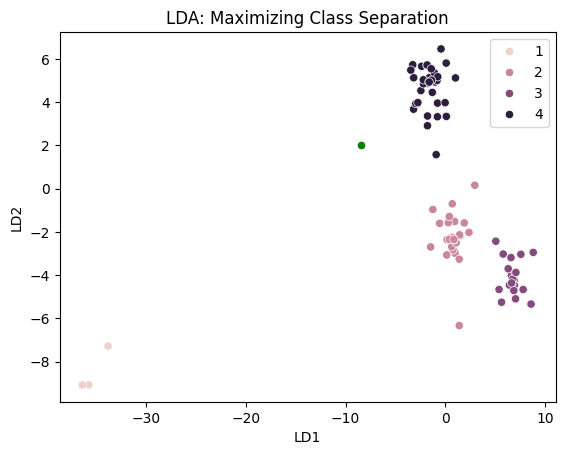

In [27]:
sns.scatterplot(x=X_lda[:,0], y=X_lda[:,1], hue=labels)
sns.scatterplot(x=X_new_lda[:,0], y=X_new_lda[:,1], color='green')
plt.title("LDA: Maximizing Class Separation")
plt.xlabel("LD1")
plt.ylabel("LD2")
plt.grid(False)
plt.show()

**A10.**
Based on proximity in the LDA space, the new sample would most likely be classified as tumor grade 4 as it looks to be the closest to that cluster.